In [430]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import numpy.typing as npt

In [ ]:
def DFT_1D(g: npt.ArrayLike) -> npt.ArrayLike:
    ''' Function for calculating the discrete fourier transform in 1D
    Parameters:
        g(np.array): 1D signal
    Returns:
        G(np.array): Frequency domain
    '''
    G_even = [0 for i in range(len(g))]
    G_odd = [0 for i in range(len(g))]
    w = len(g)
    for k in range(w):
        f = k/w
        for x in range(w):
            G_even[k] = G_even[k] + g[x]*math.cos(2*np.pi*f*x)
            G_odd[k] = G_odd[k] - g[x]*math.sin(2*np.pi*f*x)
    return np.array([complex(g_ev, g_odd) for g_ev, g_odd in zip(G_even, G_odd)])

def DFTI_1D(G: npt.ArrayLike) -> npt.ArrayLike:
    ''' Function for calculating the inverse discrete fourier transform in 1D
    Parameters:
        G(np.array): Frequency domain -> 1D array
    Returns:
        g(np.array): Time domain -> 1D array
    '''
    w = len(G)
    g_real = [0 for i in range(w)]

    for x in range(w):
        for k in range(w):
            f = k/w
            # Exponential part with eulers rule for cos and sin
            ex = (math.cos(2*np.pi*f*x)+1j*math.sin(2*np.pi*f*x))
            g_real[x] += ex*G[k]

    return np.array([(1/w)*g for g in g_real])

def DFT_2D(g_img: npt.NDArray) -> npt.NDArray:
    ''' Function for calculating the discrete fourier transform in 1D
    Parameters:
        g(np.array): 2D Image
    Returns:
        G(np.array): Frequency domain 2D
    '''

    w,h = g_img.shape
    G = np.zeros((w,h), dtype = 'complex_')
    temp_G = np.zeros((w,h), dtype = 'complex_')
    for y in range(h):
        temp_G[:,y] = DFT_1D(g_img[:,y])
        
    for x in range(w):
        G[x,:] = DFT_1D(temp_G[x,:])
    return G

def DFTI_2D(G: npt.NDArray) -> npt.NDArray:
    ''' Function for calculating the inverse discrete fourier transform in 2D
    Parameters:
        G(np.NDArray): Frequency domain -> 2D NDA
    Returns:
        g(np.NDArray): Time domain -> 1D array
    '''
    w, h = G.shape
    g = np.zeros((w,h), dtype = 'complex_')
    temp_g = np.zeros((w,h), dtype = 'complex_')
    for y in range(h):
        temp_g[:,y] = DFTI_1D(G[:,y])
    for x in range(w):
        g[x,:] = DFTI_1D(temp_g[x,:])
    return g

# DFT 1D

In [416]:
g = np.array([1,2,3,4])

G = np.fft.fft(g)
G_custom = DFT_1D(g=g)

g = np.fft.ifft(G)
g_custom = DFTI_1D(G)
print(f'G Frequency-domain numpy:\n {G}')
print(f'G Frequency-domain custom:\n {G}')
print(f'g Time-domain numpy:\n {g}')
print(f'g Time-domain custom:\n {g_custom}')

G Frequency-domain numpy:
 [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
G Frequency-domain custom:
 [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
g Time-domain numpy:
 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]
g Time-domain custom:
 [1.+0.00000000e+00j 2.+1.11022302e-16j 3.-1.66533454e-16j
 4.-4.99600361e-16j]


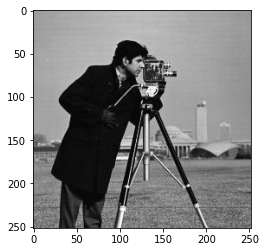

In [417]:
flag_grey = cv2.IMREAD_GRAYSCALE
Im = cv2.imread("../../data/images/cameraman.png", flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(Im, cmap="gray")

# DFT 2D

In [423]:
%timeit G = np.fft.fft2(Im)

607 µs ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [424]:
%timeit G_custom_2D = DFT_2D(Im)

49.5 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [425]:
%timeit g = np.fft.ifft2(G)

629 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [426]:
%timeit g_custom = DFTI_2D(G)

15 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


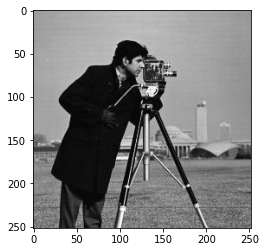

In [427]:
plt.imshow(g_custom.real, cmap='gray')